In [66]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv


## STEP 1: Load Dataset

In [98]:
file_name=r"C:\Users\jakku\Data files\titanic_ dataset_final.csv"
df=pd.read_csv(file_name)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [99]:
dtypes=df.dtypes
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(exclude='object').columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


## STEP 2: Check Missing Values & Duplicates

In [100]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

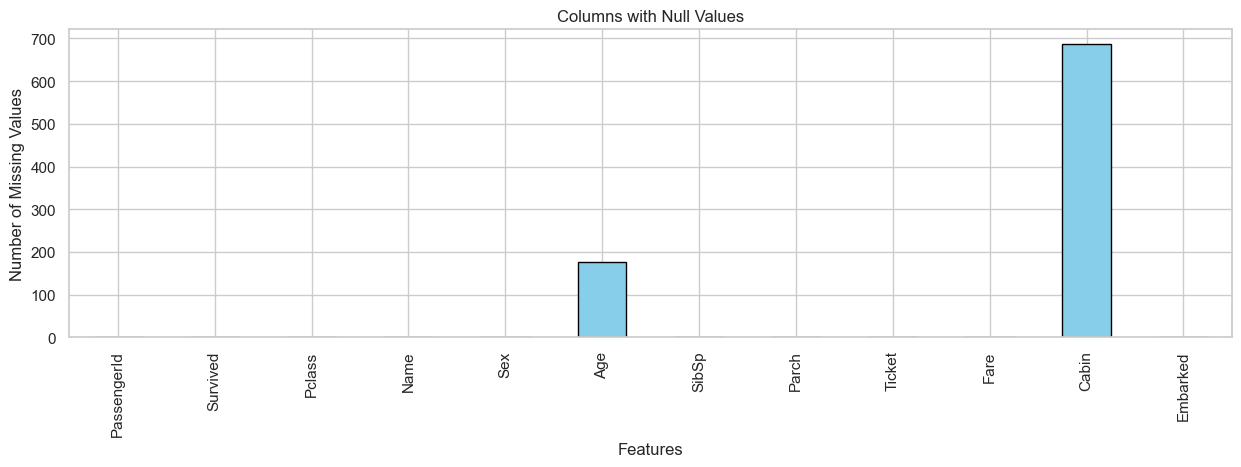

In [105]:
import matplotlib.pyplot as plt

# Count missing values
missing = df.isna().sum()

plt.figure(figsize=(15,4))
missing.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Columns with Null Values")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.show()


In [106]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [85]:
import warnings
warnings.filterwarnings("ignore")


## STEP 3: Data Cleaning

In [107]:
df = df.drop(columns=["Cabin"])

# Fill missing Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill missing Embarked with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Encode categorical features
df["Sex_num"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked_num"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

print("\nMissing values after cleaning:\n", df.isnull().sum())




Missing values after cleaning:
 PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Sex_num         0
Embarked_num    0
dtype: int64


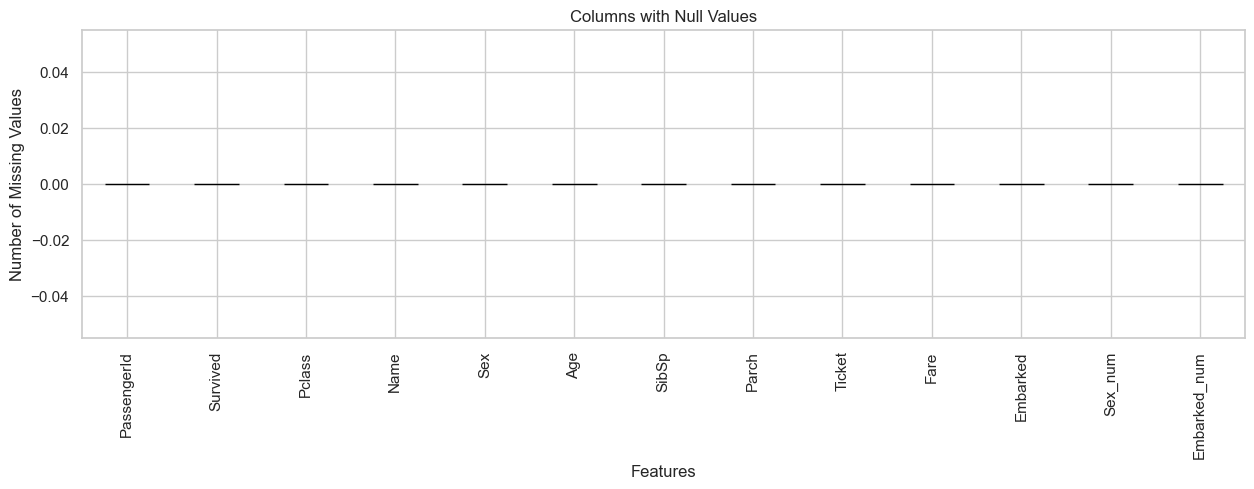

In [108]:
import matplotlib.pyplot as plt

# Count missing values
missing = df.isna().sum()

plt.figure(figsize=(15,4))
missing.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Columns with Null Values")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.show()


In [109]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Sex_num         0
Embarked_num    0
dtype: int64

In [110]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

## STEP 4: Basic Statistical Analysis

In [111]:
print("\nData Types:\n", df.dtypes)
print("\nNumeric Summary:\n", df.describe())




Data Types:
 PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
Sex_num           int64
Embarked_num      int64
dtype: object

Numeric Summary:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

          

In [112]:
# IMPORTANT: Survived column explanation
print("\nSurvived column meaning:")
print("0 = Did not survive")
print("1 = Survived")



Survived column meaning:
0 = Did not survive
1 = Survived


In [113]:

# Value counts
print("\nSex distribution:\n", df["Sex"].value_counts())
print("\nEmbarked distribution:\n", df["Embarked"].value_counts())
print("\nPclass distribution:\n", df["Pclass"].value_counts())



Sex distribution:
 Sex
male      577
female    314
Name: count, dtype: int64

Embarked distribution:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Pclass distribution:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [114]:

# Survival Rates
print("\nOverall Survival Rate:", df["Survived"].mean() * 100, "%")
print("\nSurvival Rate by Sex:\n", df.groupby("Sex")["Survived"].mean() * 100)
print("\nSurvival Rate by Pclass:\n", df.groupby("Pclass")["Survived"].mean() * 100)
print("\nSurvival Rate by Embarked:\n", df.groupby("Embarked")["Survived"].mean() * 100)


Overall Survival Rate: 38.38383838383838 %

Survival Rate by Sex:
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Survival Rate by Pclass:
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Survival Rate by Embarked:
 Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


## STEP 5: Visualizations

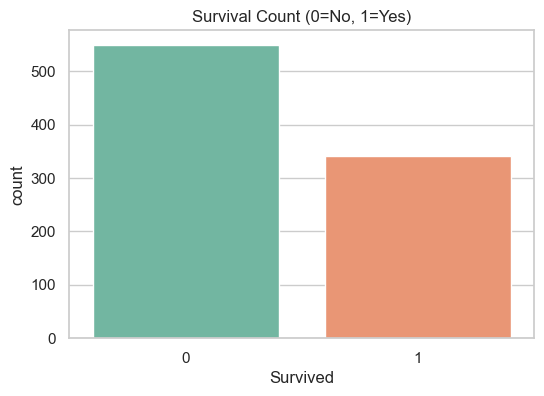

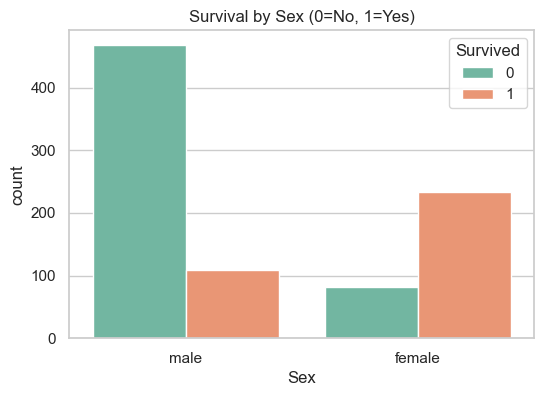

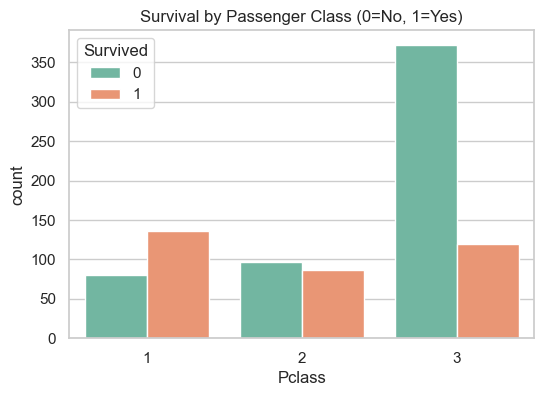

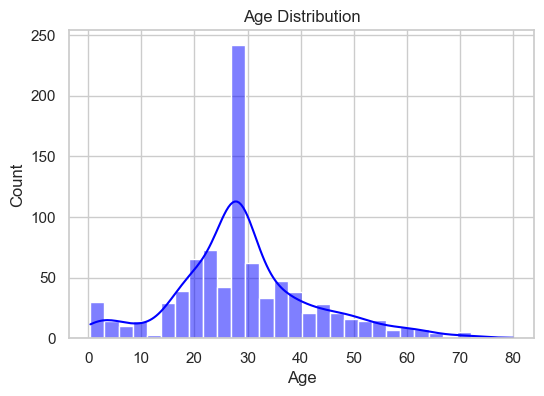

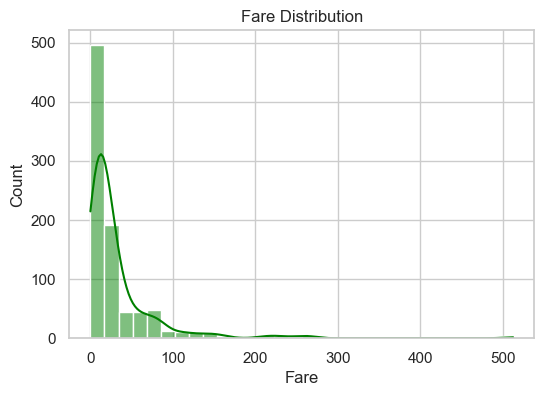

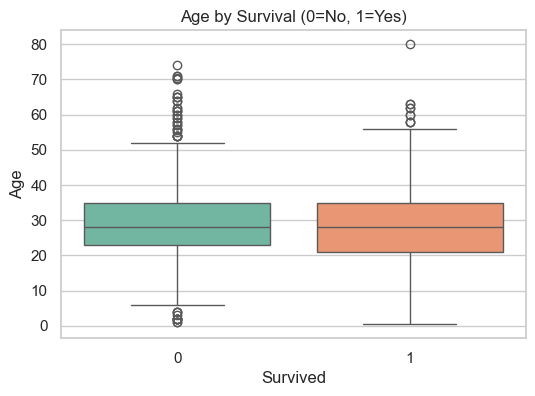

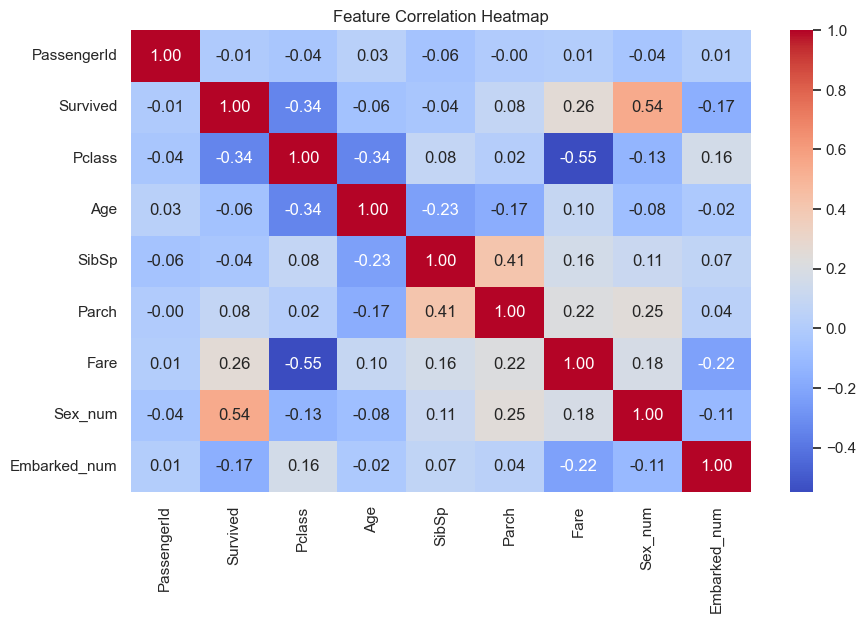

In [115]:
sns.set_style("whitegrid")

# Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Count (0=No, 1=Yes)")
plt.show()

# Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set2")
plt.title("Survival by Sex (0=No, 1=Yes)")
plt.show()

# Survival by Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set2")
plt.title("Survival by Passenger Class (0=No, 1=Yes)")
plt.show()

# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], kde=True, bins=30, color="blue")
plt.title("Age Distribution")
plt.show()

# Fare Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Fare"], kde=True, bins=30, color="green")
plt.title("Fare Distribution")
plt.show()

# Age by Survival
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=df, palette="Set2")
plt.title("Age by Survival (0=No, 1=Yes)")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()